# A12 Dual-lens optical system
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.4.15

In [40]:
import sympy as sp
import numpy as np
import pandas as pd

## EXP1 microscope

In [41]:
f01=45
fe1=29

In [42]:
df1=pd.read_excel('A12microscope.xlsx')
df1=df1.set_index('idx',drop=True)

df1.loc['Mexp']=df1.loc['l']*5 / df1.loc['a']
df1.loc['Mthe']=df1.loc['d2']*(df1.loc['d1']-f01-fe1) / (f01*fe1)

print(df1.round(decimals=2))

           1       2       3       4       5
idx                                         
l       5.00   11.00   16.00   22.00   28.00
a       1.00    2.00    3.00    4.00    5.00
Mexp   25.00   27.50   26.67   27.50   28.00
d2    253.00  249.00  251.00  253.00  255.00
d1    250.00  245.00  263.00  247.00  251.00
Mthe   34.12   32.63   36.35   33.54   34.59


In [43]:
M_mcs=df1.loc['Mexp'].mean()
M_mcs_the=df1.loc['Mthe'].mean()

print(M_mcs,M_mcs_the,'%.2f%%' % ((M_mcs_the-M_mcs)/M_mcs_the * 100))

26.933333333333337 34.245210727969344 21.35%


In [44]:
M_mcs_SA=df1.loc['Mexp'].std()
M_mcs_SB=1/(5*(3)**(1/2))
M_mcs_S=( (M_mcs_SA)**2 + (M_mcs_SB)**2 )**(1/2)
print(M_mcs_SA,M_mcs_SB,M_mcs_S)

1.182041548433143 0.11547005383792516 1.1876681167546579


In [45]:
M_mcs_VA=4
M_mcs_VB=1
M_mcs_V=M_mcs_S**4 / ( (M_mcs_SA)**4/M_mcs_VA + (M_mcs_SB)**4/M_mcs_VB )
print(M_mcs_VA,M_mcs_VB,M_mcs_V)

4 1 4.075221780887926


## EXP2 telescope

In [46]:
f02=225
fe2=45

In [47]:
df2=pd.read_excel('A12telescope.xlsx')
df2=df2.set_index('idx',drop=True)

df2.loc['d2']=df2.loc['a1']-df2.loc['a2']
df2.loc['Mexp']=df2.loc['d2'] / df2.loc['d1']
df2.loc['Mthe']=f02/fe2
df2.loc['Mexpmod']=df2.loc['Mthe']*df2.loc['S'] / (df2.loc['S']+f02)

print(df2.round(decimals=2))

               1        2        3        4        5
idx                                                 
d1         50.00    50.00    50.00    50.00    50.00
a1        287.50   298.00   317.00   305.00   297.00
a2         50.00    50.00    50.00    50.00    50.00
d2        237.50   248.00   267.00   255.00   247.00
Mexp        4.75     4.96     5.34     5.10     4.94
S        3034.00  3034.00  3034.00  3034.00  3034.00
Mexpmod     4.65     4.65     4.65     4.65     4.65
Mthe        5.00     5.00     5.00     5.00     5.00


In [48]:
M_tls=df2.loc['Mexp'].mean()

M_tls_the=df2.loc['Mthe'].mean()
print(M_tls,M_tls_the,'%.2f%%' % (abs((M_tls_the-M_tls)/M_tls_the) * 100))

5.018 5.0 0.36%


In [49]:
d1, d2 = sp.symbols('d1 d2')
M=d2/d1

d2val=df2.loc['d2'].mean()
d1val=df2.loc['d1'].mean()

diffM_d1=sp.diff(M,d1).evalf(subs ={'d2':d2val,'d1':d1val})
diffM_d2=sp.diff(M,d2).evalf(subs ={'d2':d2val,'d1':d1val})


In [50]:
M_tls_SA=( ( diffM_d1 * df2.loc['d1'].std() )**2 + ( diffM_d2 * df2.loc['d2'].std() )**2 ) **(1/2)

sb=1/(3)**(1/2)
M_tls_SB=( (diffM_d1*sb)**2 + (diffM_d2*sb)**2 ) **(1/2)

M_tls_S=( (M_tls_SA)**2 + (M_tls_SB)**2 )**(1/2)
print(M_tls_SA,M_tls_SB,M_tls_S)

0.218906372680194 0.0590822297029036 0.226739299343247


In [51]:
M_tls_VA=4
M_tls_VB=1
M_tls_V=M_tls_S**4 / ( (M_tls_SA)**4/M_tls_VA + (M_tls_SB)**4/M_tls_VB )
print(M_tls_VA,M_tls_VB,M_tls_V)

4 1 4.50829168735835


## EXP3 illustrate how the parameters of lens influence the magnification

In [52]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d 
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline


# %matplotlib qt5
%matplotlib inline

### EXP3.1 Microscope

In [53]:
def M_MSC(d1=240,f0=45,fe=29,d2=250):
    return (d1-f0-fe)*d2 / (f0*fe)

             0           1           2           3           4           5
d1  100.000000  120.000000  140.000000  160.000000  180.000000  200.000000
M     4.980843    8.812261   12.643678   16.475096   20.306513   24.137931


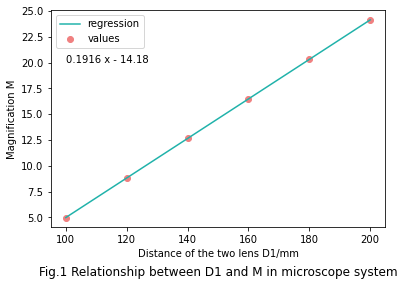

In [54]:
D1=np.arange(100,220,20)
M1=M_MSC(d1=D1)
Table1=pd.DataFrame([D1,M1])
Table1.index=['d1','M']
print(Table1)


reg = np.polyfit(D1, M1, 1)
p1 = np.poly1d(reg)
ry = np.polyval(reg, D1)


plt.scatter(D1, M1, color='lightcoral', label='values')
plt.plot(D1, ry, color='lightseagreen', label='regression')

plt.text(100,20,p1)
plt.legend(loc=0)

plt.xticks(D1)
plt.xlabel('Distance of the two lens D1/mm')
plt.ylabel('Magnification M')
plt.title('Fig.1 Relationship between D1 and M in microscope system',y=-0.25)
plt.legend()

            0          1          2          3          4          5
f0  20.000000  30.000000  40.000000  50.000000  60.000000  70.000000
M   82.327586  52.011494  36.853448  27.758621  21.695402  17.364532


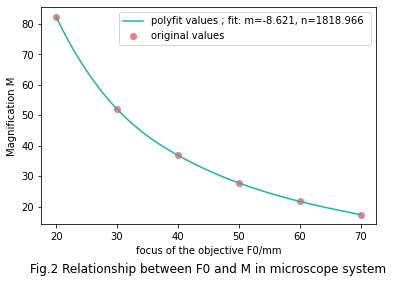

In [55]:
F0=np.arange(20,80,10)
M2=M_MSC(f0=F0)
Table2=pd.DataFrame([F0,M2])
Table2.index=['f0','M']
print(Table2)

plt.scatter(F0, M2, color='lightcoral', label='original values')


def func_f0_M(f, m, n):
    return m + n/f
# PUT THE VARIABLE FIRST
popt, pcov = curve_fit(func_f0_M, F0, M2)


f0new=np.linspace(F0.min(),F0.max(),100)
func_smooth=UnivariateSpline(F0,M2,s=0) 
plt.plot(f0new, func_smooth(f0new), color='lightseagreen', label='polyfit values ; fit: m=%5.3f, n=%5.3f ' % tuple(popt))


plt.xticks(F0)
plt.xlabel('focus of the objective F0/mm')
plt.ylabel('Magnification M')
plt.title('Fig.2 Relationship between F0 and M in microscope system',y=-0.25)
plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 0.85), loc=3, borderaxespad=0)


            0          1          2          3     4          5
Fe  20.000000  30.000000  40.000000  50.000000  60.0  70.000000
M   48.611111  30.555556  21.527778  16.111111  12.5   9.920635


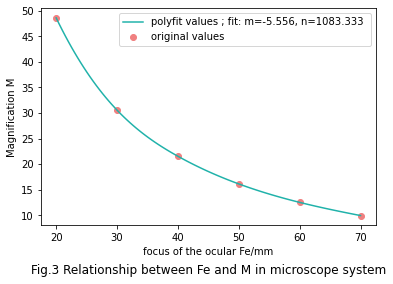

In [56]:
Fe=np.arange(20,80,10)
M3=M_MSC(fe=Fe)
Table3=pd.DataFrame([Fe,M3])
Table3.index=['Fe','M']
print(Table3)

plt.scatter(Fe, M3, color='lightcoral', label='original values')

def func_fe_M(f, m, n):
    return m + n/f

popt, pcov = curve_fit(func_fe_M, Fe, M3)


Fenew=np.linspace(Fe.min(),Fe.max(),100)
func_smooth=UnivariateSpline(Fe,M3,s=0) 
plt.plot(Fenew, func_smooth(Fenew), color='lightseagreen', label='polyfit values ; fit: m=%5.3f, n=%5.3f ' % tuple(popt))


plt.xticks(Fe)
plt.xlabel('focus of the ocular Fe/mm')
plt.ylabel('Magnification M')
plt.title('Fig.3 Relationship between Fe and M in microscope system',y=-0.25)
plt.legend()

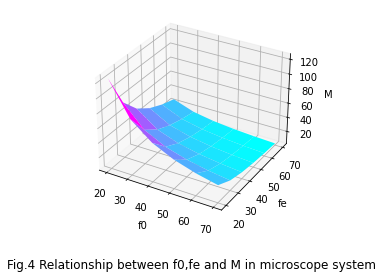

In [57]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

x, y = np.meshgrid(F0, Fe) 
z = M_MSC(f0=x, fe=y)
# ax.plot_wireframe(x,y,z) 
ax.set_xlabel('f0') 
ax.set_ylabel('fe')
ax.set_zlabel('M') 


ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap ='cool', edgecolor ='none') 
ax.set_title('Fig.4 Relationship between f0,fe and M in microscope system',y=-0.25)

plt.show()


### EXP3.2 Telescope

In [58]:
def M_TLS(f1=225,f2=45):
    return f1/f2

             0           1           2           3           4           5
f1  200.000000  210.000000  220.000000  230.000000  240.000000  250.000000
M     4.444444    4.666667    4.888889    5.111111    5.333333    5.555556
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


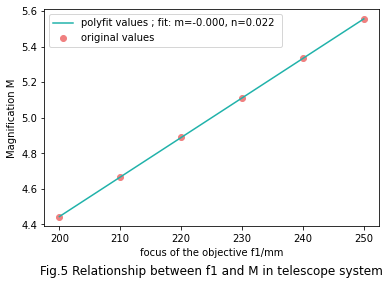

In [59]:
f1=np.arange(200,260,10)
M4=M_TLS(f1=f1)
Table4=pd.DataFrame([f1,M4])
Table4.index=['f1','M']
print(Table4)

plt.scatter(f1, M4, color='lightcoral', label='original values')

def func_f1_M(f, m, n):
    return m + n*f
# PUT THE VARIABLE FIRST
popt, pcov = curve_fit(func_f1_M, f1, M4)


f1new=np.linspace(f1.min(),f1.max(),100)
func_smooth=UnivariateSpline(f1,M4,s=0) 
plt.plot(f1new, func_smooth(f1new), color='lightseagreen', label='polyfit values ; fit: m=%5.3f, n=%5.3f ' % tuple(popt))


plt.xticks(f1)
plt.xlabel('focus of the objective f1/mm')
plt.ylabel('Magnification M')
plt.title('Fig.5 Relationship between f1 and M in telescope system',y=-0.25)
plt.legend()


        0     1       2     3      4          5
f2  20.00  30.0  40.000  50.0  60.00  70.000000
M   11.25   7.5   5.625   4.5   3.75   3.214286


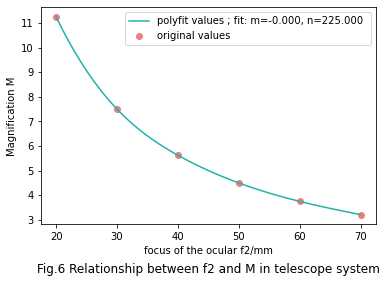

In [60]:
f2=np.arange(20,80,10)
M5=M_TLS(f2=f2)
Table5=pd.DataFrame([f2,M5])
Table5.index=['f2','M']
print(Table5)

plt.scatter(f2, M5, color='lightcoral', label='original values')

def func_f2_M(f, m, n):
    return m + n/f
# PUT THE VARIABLE IN THE FIRST PLACE!
popt, pcov = curve_fit(func_f2_M, f2, M5)


f2new=np.linspace(f2.min(),f2.max(),100)
func_smooth=UnivariateSpline(f2,M5,s=0) 
plt.plot(f2new, func_smooth(f2new), color='lightseagreen', label='polyfit values ; fit: m=%5.3f, n=%5.3f ' % tuple(popt))


plt.xticks(f2)
plt.xlabel('focus of the ocular f2/mm')
plt.ylabel('Magnification M')
plt.title('Fig.6 Relationship between f2 and M in telescope system',y=-0.25)
plt.legend()


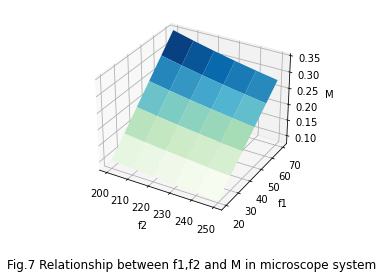

In [61]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

x, y = np.meshgrid(f1, f2) 
z = M_TLS(f2=x, f1=y)

ax.set_xlabel('f2') 
ax.set_ylabel('f1')
ax.set_zlabel('M') 


ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap ='GnBu', edgecolor ='none') 
ax.set_title('Fig.7 Relationship between f1,f2 and M in microscope system',y=-0.25)

plt.show()